In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

#Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load the dataset
file_path = "CPSData.csv"  # Update the path if needed
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131302 entries, 0 to 131301
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PeopleInHousehold   131302 non-null  int64  
 1   Region              131302 non-null  object 
 2   State               131302 non-null  object 
 3   MetroAreaCode       97064 non-null   float64
 4   Age                 131302 non-null  int64  
 5   Married             105964 non-null  object 
 6   Sex                 131302 non-null  object 
 7   Education           105964 non-null  object 
 8   Race                131302 non-null  object 
 9   Hispanic            131302 non-null  int64  
 10  CountryOfBirthCode  131302 non-null  int64  
 11  Citizenship         131302 non-null  object 
 12  EmploymentStatus    105513 non-null  object 
 13  Industry            66242 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 14.0+ MB
None


Text(0, 0.5, 'Frequency')

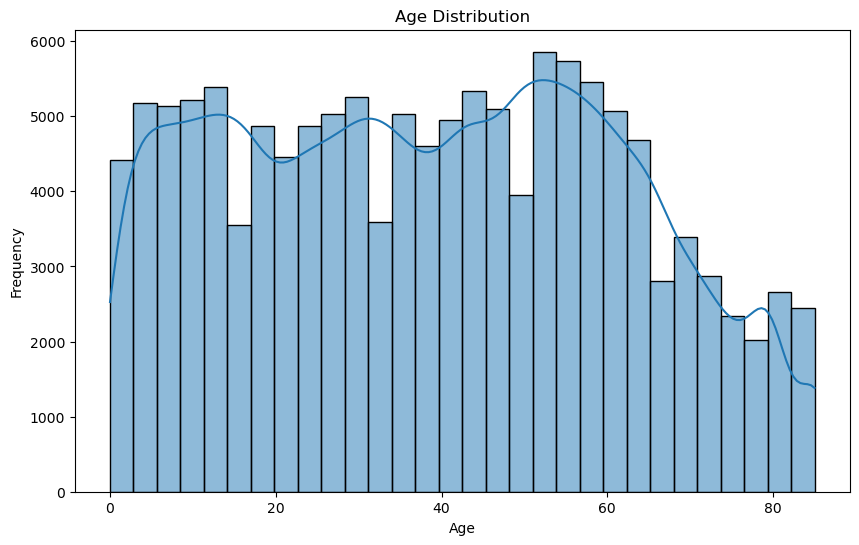

In [3]:
# Exploratory Visualization Example 1: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")


In [4]:
# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(data.head())


First Few Rows:
   PeopleInHousehold Region    State  MetroAreaCode  Age        Married  \
0                  1  South  Alabama        26620.0   85        Widowed   
1                  3  South  Alabama        13820.0   21  Never Married   
2                  3  South  Alabama        13820.0   37  Never Married   
3                  3  South  Alabama        13820.0   18  Never Married   
4                  3  South  Alabama        26620.0   52        Widowed   

      Sex               Education   Race  Hispanic  CountryOfBirthCode  \
0  Female        Associate degree  White         0                  57   
1    Male             High school  Black         0                  57   
2  Female             High school  Black         0                  57   
3    Male  No high school diploma  Black         0                  57   
4  Female        Associate degree  White         0                  57   

       Citizenship    EmploymentStatus                            Industry  
0  Citizen

In [5]:
# Handle missing values (example: filling with placeholders or dropping)
#print("\nMissing Values Count:")
#print(data.isnull().sum())

In [6]:
# Removed MetroAreaCode column
## Dropped because we did not use it and did not have the code dictionary to determine area code and make it usable
data = data.drop(columns=['MetroAreaCode'])

In [7]:
#Check to see MetroAreaCode column is removed
print(data.columns)

Index(['PeopleInHousehold', 'Region', 'State', 'Age', 'Married', 'Sex',
       'Education', 'Race', 'Hispanic', 'CountryOfBirthCode', 'Citizenship',
       'EmploymentStatus', 'Industry'],
      dtype='object')


In [8]:
# Remove the rows where age is less than 15, as the legal working age in some states starts at 15
##Anything else may be self-report error and not accurate
data = data[data['Age'] >= 15]

In [9]:
# Replace infinite values with NaN
#data.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

# Drop rows with NaN (if necessary)
#data.dropna(inplace=True)

In [10]:
# Fill or drop missing values as necessary
# Dropping rows with missing values in key columns
#cleaned_data = data.dropna(subset=['Married', 'Education', 'EmploymentStatus', 'Industry'])

# Display a summary of cleaned data
#print("\nCleaned Data Summary:")
#print(cleaned_data.info())

In [11]:
# Display a summary of cleaned data
#print("\nCleaned Data Summary:")
#print(cleaned_data.info())

# Save cleaned data for further use
#cleaned_data.to_csv("Cleaned_CPSData.csv", index=False)

In [12]:
# Group the data by household size and education level
groupedData = data.groupby(['PeopleInHousehold', 'Education']).size().reset_index(name='Count')

In [13]:
# Pivot the data for plotting
pivotData = groupedData.pivot(index='PeopleInHousehold', columns='Education', values='Count').fillna(0)

In [14]:
# Apply all filters and modifications
filteredData = (
    data[data['Education'] != 'Professional degree']  # Remove rows with 'Professional degree'
    .query('PeopleInHousehold < 8')                   # Keep rows where household size is less than 8
)

# Update the Race column to "Hispanic" wherever the Hispanic column is 1
filteredData.loc[filteredData['Hispanic'] == 1, 'Race'] = 'Hispanic'

# Drop the Hispanic column
filteredData = filteredData.drop(columns=['Hispanic'])

# Display the resulting filtered data
filteredData.head()

,PeopleInHousehold,Region,State,Age,Married,Sex,Education,Race,CountryOfBirthCode,Citizenship,EmploymentStatus,Industry
0,1,South,Alabama,85,Widowed,Female,Associate degree,White,57,"Citizen, Native",Retired,NaN
1,3,South,Alabama,21,Never Married,Male,High school,Black,57,"Citizen, Native",Unemployed,Professional and business services
2,3,South,Alabama,37,Never Married,Female,High school,Black,57,"Citizen, Native",Disabled,NaN
3,3,South,Alabama,18,Never Married,Male,No high school diploma,Black,57,"Citizen, Native",Not in Labor Force,NaN
4,3,South,Alabama,52,Widowed,Female,Associate degree,White,57,"Citizen, Native",Employed,Professional and business services


In [15]:
#Normalizing data
normalize = False  # Set to True for proportions or False for raw numbers

# Normalize the data if needed
if normalize:
    pivotData = pivotData.div(pivotData.sum(axis=1), axis=0)

In [16]:
# Define custom colors for each education level
customColors = ['#0c3547', '#10656d', '#598f91', '#93b071', '#ede2cc', '#edae93', '#dd6670','#eeb3b8']

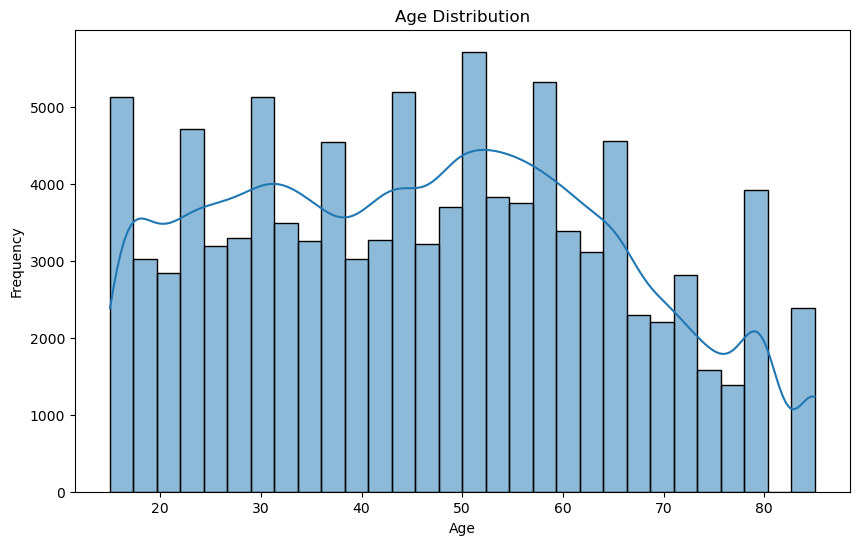

In [17]:
#Visualization: Age Distribution of Sample
plt.figure(figsize=(10, 6))
sns.histplot(data=filteredData, x='Age', bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Save the chart as a PNG file
plt.savefig("age_distribution.png", dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

In [18]:
###Question 1: Demographic Insight
#How do demographic factors (e.g., age, race, education level, household size) vary across regions, and what implications does this have for employment and socioeconomic outcomes?
##Focus: Understanding regional diversity and identifying disparities or opportunities in employment.
##Visualizations: Bar charts, pie charts, or histograms showing the distribution of individuals by region, state, age, and race.

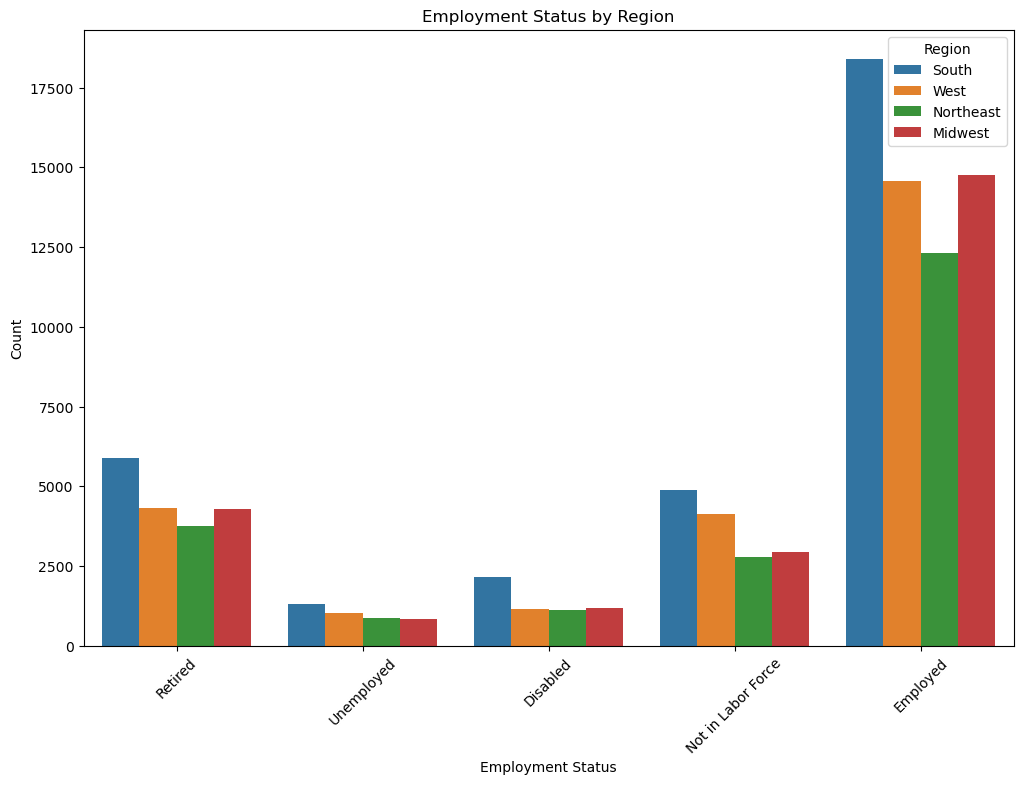

In [19]:
#Employment Status by Region
plt.figure(figsize=(12, 8))
sns.countplot(data=filteredData, x='EmploymentStatus', hue='Region')
plt.title("Employment Status by Region")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.legend(title="Region")
plt.xticks(rotation=45)

# Save the chart as a PNG file
plt.savefig("employment_by_region.png", dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

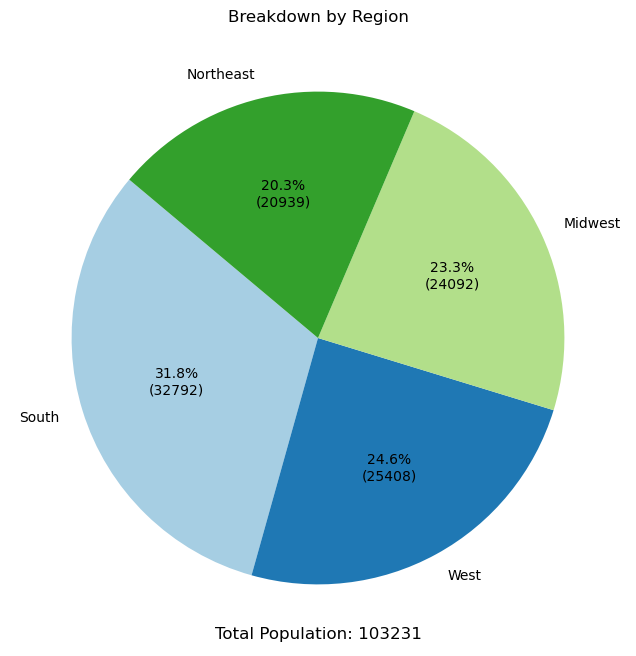

In [20]:
# Pie Chart: Breakdown by Region with Different Colors
region_counts = filteredData['Region'].value_counts()

# Define a color palette (one color per slice)
colors = plt.cm.Paired(range(len(region_counts)))

# Calculate total population
total_population = region_counts.sum()

# Function to display percentages and absolute numbers
def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{pct:.1f}%\n({absolute})"

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    region_counts,
    labels=region_counts.index,
    autopct=lambda pct: autopct_format(pct, region_counts),
    startangle=140,
    colors=colors  # Use the defined color palette
)
plt.title("Breakdown by Region")
plt.text(
    0, -1.2,  # Position of the subtitle
    f"Total Population: {total_population}",  # Subtitle text
    ha='center',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=12
)

# Save the chart as a PNG file
plt.savefig("distribution_by_region.png", dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

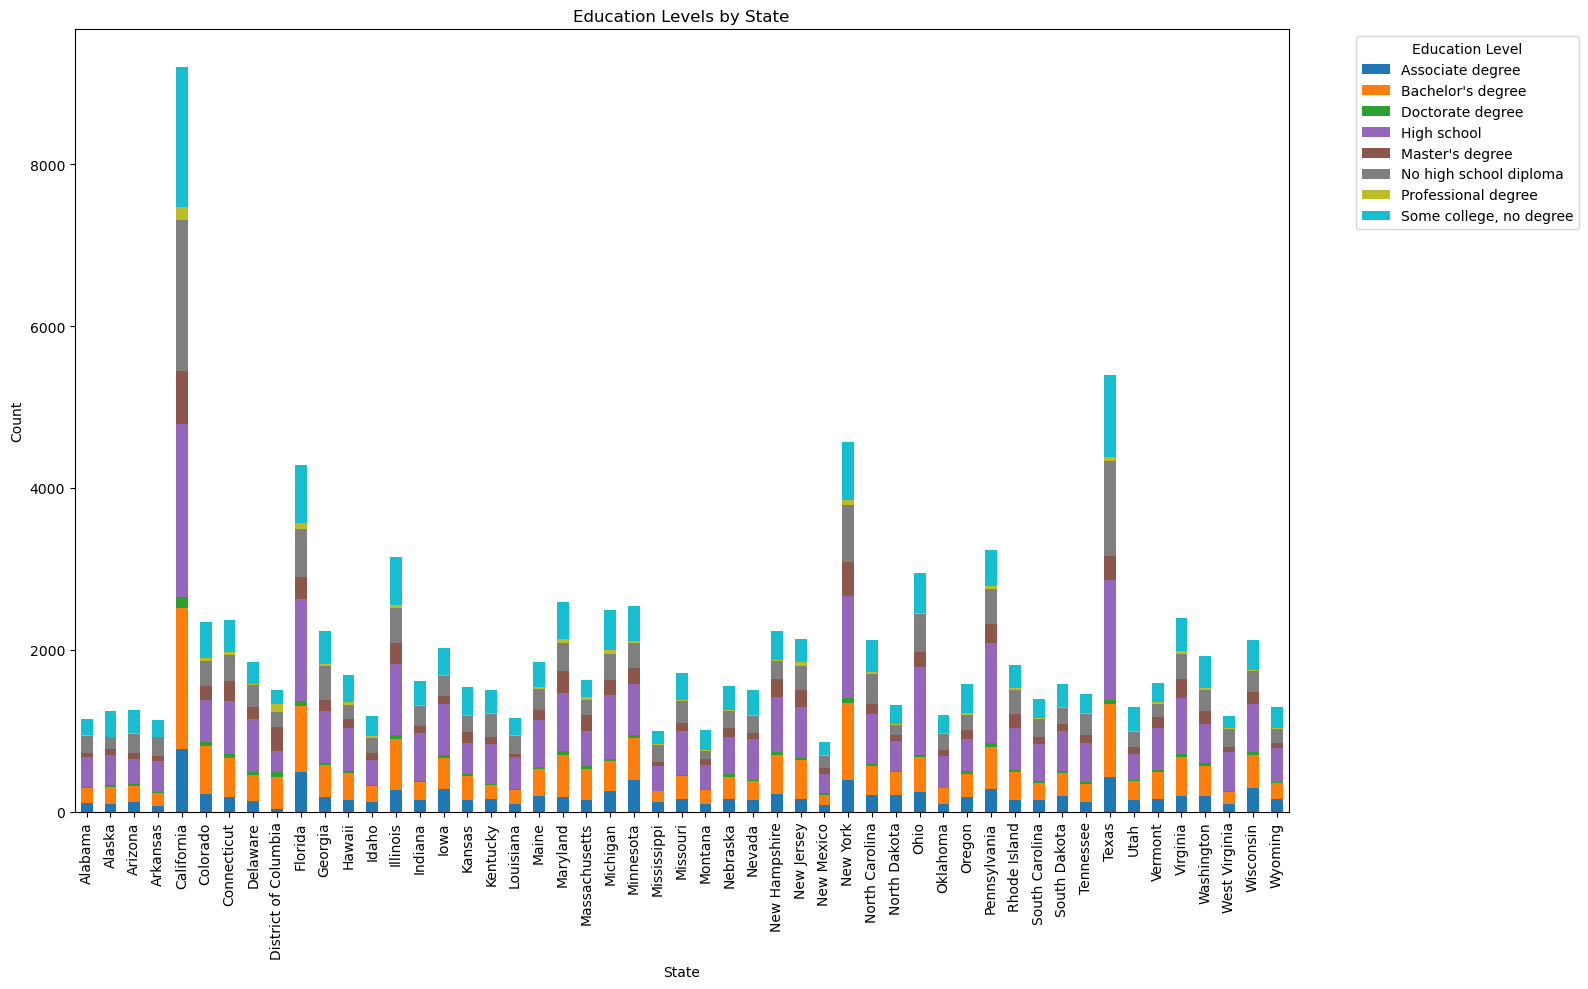

In [21]:
#Visualization of Education Levels by State
# Check for missing values in State and Education columns and drop them if necessary
education_state_data = (
    data.dropna(subset=['State', 'Education'])
    .groupby(['State', 'Education'])
    .size()
    .unstack(fill_value=0)
)

# Plot the stacked bar chart
education_state_data.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 10),
    colormap='tab10'
)
plt.title("Education Levels by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()

# Save the chart as a PNG file
plt.savefig("education_by_state.png", dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

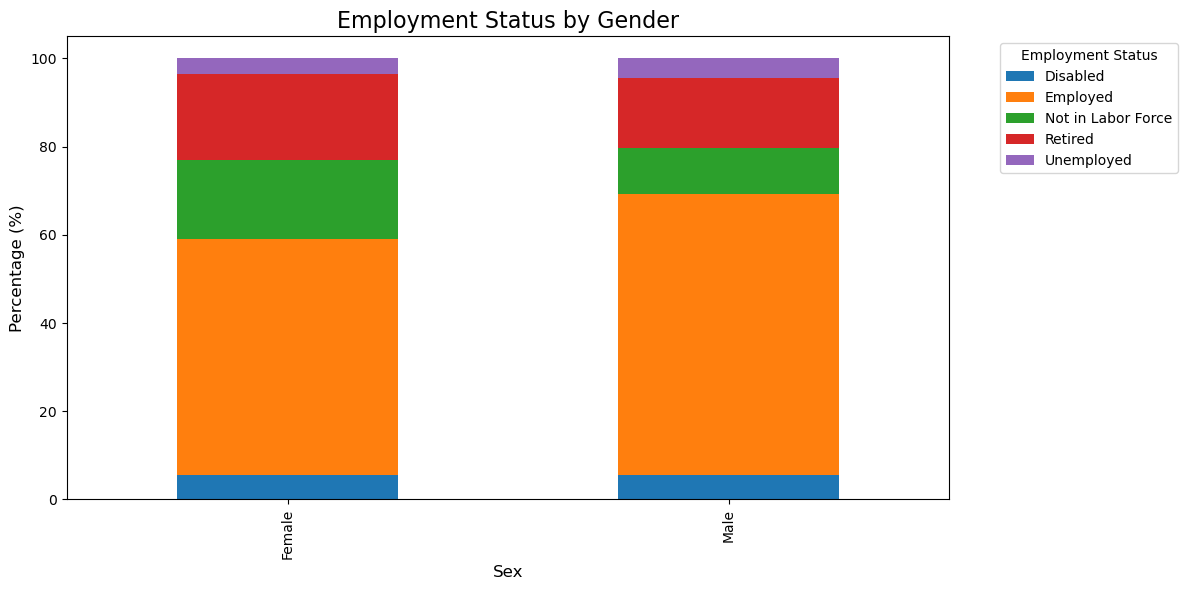

In [22]:
# Group by Gender and EmploymentStatus
employment_gender = filteredData.groupby(['Sex', 'EmploymentStatus']).size().unstack(fill_value=0)

# Calculate percentage distribution for each gender
employment_gender_pct = employment_gender.div(employment_gender.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
employment_gender_pct.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Employment Status by Gender', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the chart as a PNG file
plt.savefig("employment_by_gender.png", dpi=300, bbox_inches='tight')

# Display the chart
plt.show()


In [23]:
###Question 2: Employment Status and Trends
#What are the key employment patterns across different demographic groups (e.g., gender, age, education level, marital status)?
##Focus: Identify differences in employment status and education level,  based on gender, age, and marital status.
##Potential Insights: Identify employment barriers or disparities among different demographic groups (e.g., gender gaps, education-driven employment outcomes).
##Visualizations: Stacked bar charts, cor heatmaps showing patterns of employment, unemployment, and participation across age groups, education levels, and gender.

In [24]:
# Employment Status by Age Group
age_data = data.groupby(['Age','EmploymentStatus']).size().unstack().fillna(0)

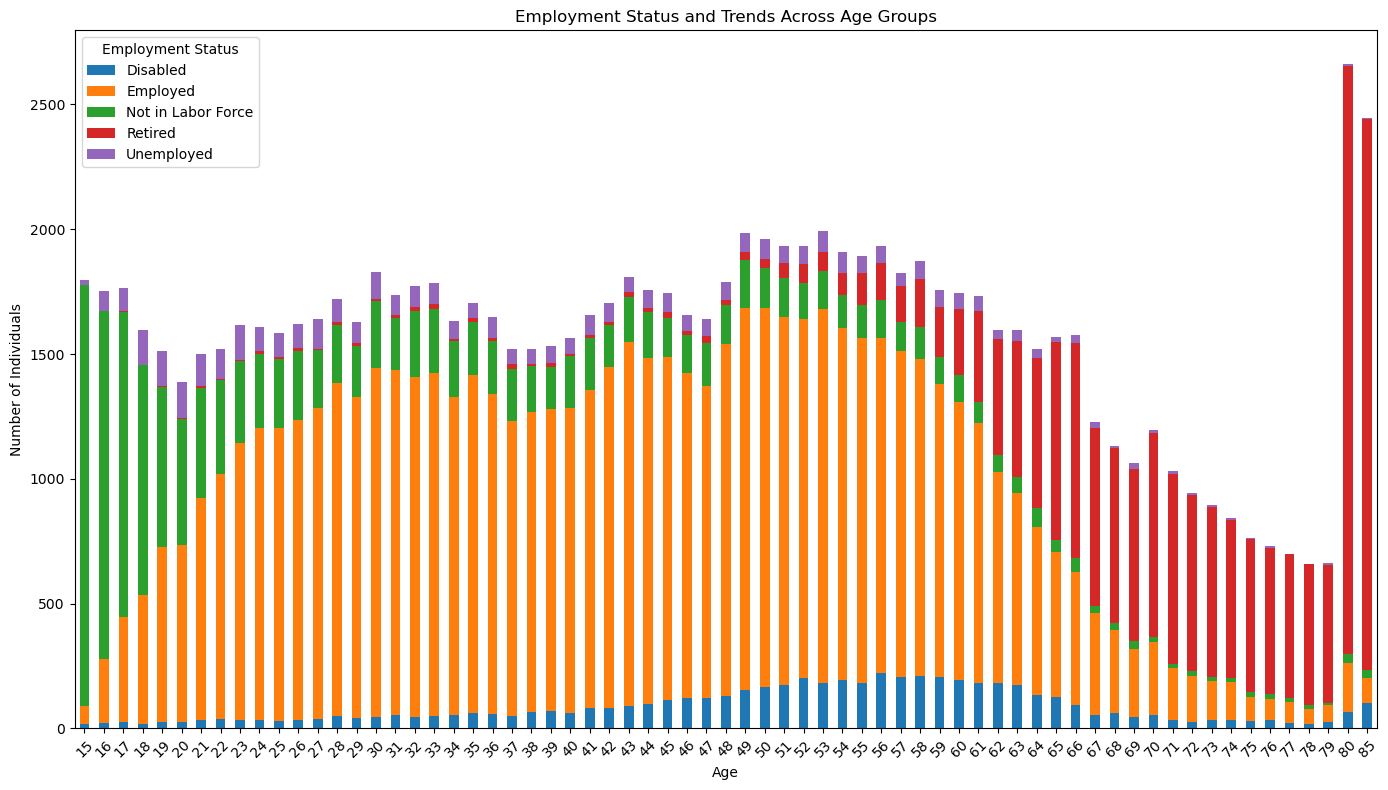

In [25]:
# Visualization/Employment Status by Age Group: This bar chart provides a clear visual representation of how employment status varies by age, allowing you to identify trends, disparities, and insights related to employment and participation in the labor market across different age demographics.
# Using Stacked bar chart show patterns of employment, unemployment, and participation across age groups
age_data.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Employment Status and Trends Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.legend(title='Employment Status')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart as a PNG file
plt.savefig("employment_by_age.png", dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

In [26]:
#Employment Status by Gender
gender_data = data.groupby(['EmploymentStatus', 'Married']).size().unstack().fillna(0)

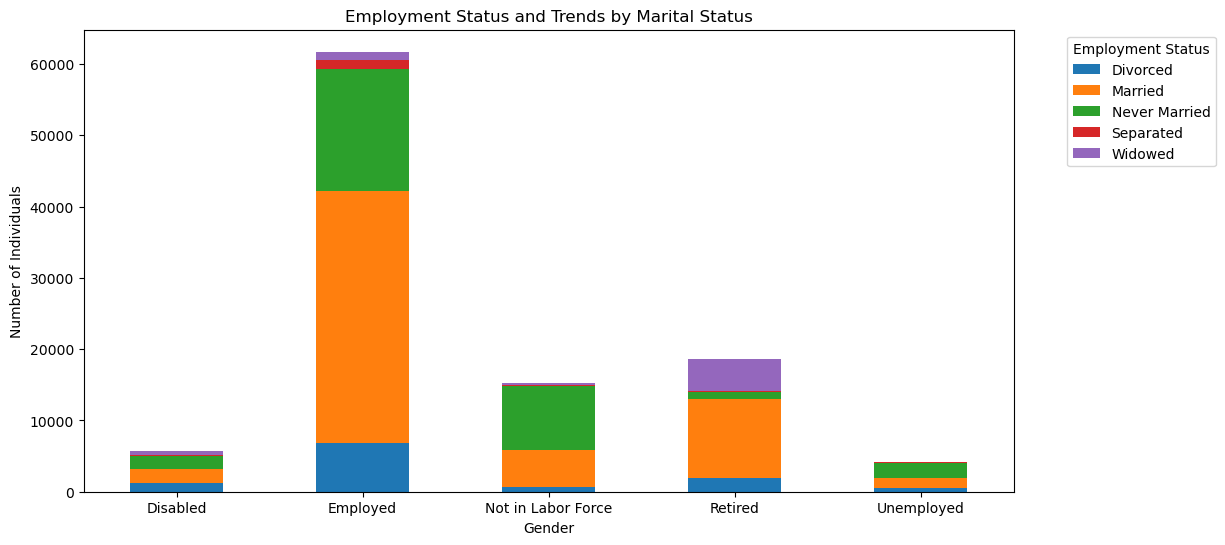

In [27]:
#Visualization/Employment Status by Marrital Status: The stacked bar chart provides a visual comparison of employment, unemployment, 
#and participation rates across various marital status categories, such as single, married, divorced, and widowed"""  
#Using Stacked bar chart show patterns of employment, unemployment, and participation across gender groups
gender_data.plot(kind='bar', stacked=True,figsize=(12, 6))
plt.title('Employment Status and Trends by Marital Status')
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Save the chart as a PNG file
plt.savefig("employment_by_marital.png", dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

In [28]:
###Question 3: Employment Status and Trends
#What are the key employment patterns across different demographic groups (e.g., gender, age, education level, marital status)?
##Focus: Identify differences in employment status and education level,  based on gender, age, and marital status.
##Potential Insights: Identify employment barriers or disparities among different demographic groups (e.g., gender gaps, education-driven employment outcomes).
##Visualizations: Stacked bar charts, cor heatmaps showing patterns of employment, unemployment, and participation across age groups, education levels, and gender.


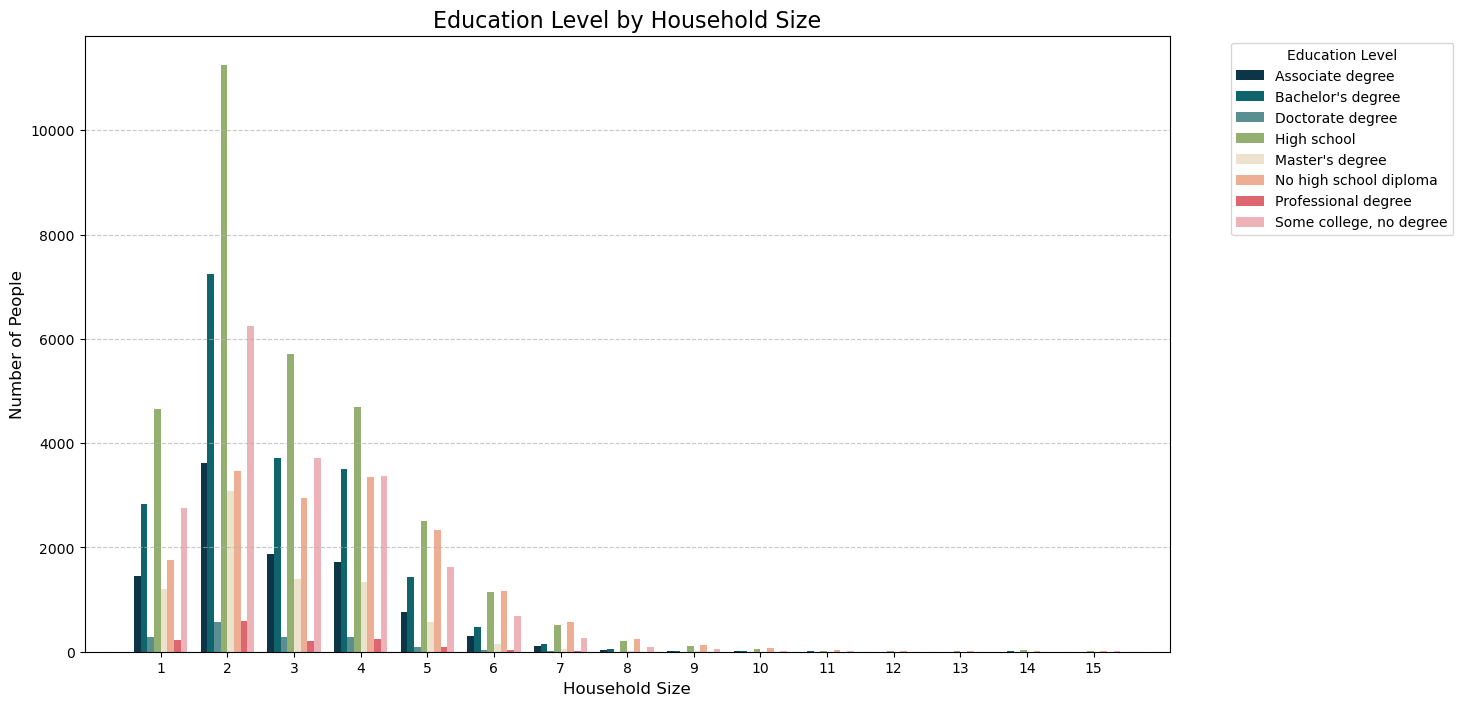

In [29]:
# Plot the segmented bar chart
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.8 / len(pivotData.columns)  # Divide bar width by the number of categories
x = np.arange(len(pivotData.index))  # X positions for household sizes



for i, col in enumerate(pivotData.columns):
    ax.bar(
        x + i * bar_width,  # Offset bars for each education level
        pivotData[col],
        bar_width,
        label=col,
        color=customColors[i % len(customColors)]  # Assign colors
    )

# Customize the plot
ax.set_title('Education Level by Household Size', fontsize=16)
ax.set_xlabel('Household Size', fontsize=12)
ax.set_ylabel('Proportion of People' if normalize else 'Number of People', fontsize=12)
ax.set_xticks(x + bar_width * (len(pivotData.columns) - 1) / 2)  # Center tick labels
ax.set_xticklabels(pivotData.index, fontsize=10)
ax.legend(title='Education Level', fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1))
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save the chart as a PNG file
plt.savefig("education_by_household.png", dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

In [30]:
# Step 2: Group Data by Region and Race
grouped_data = filteredData.groupby(['Region', 'Race']).agg(
    AvgHouseholdSize=('PeopleInHousehold', 'mean'),
    MedianHouseholdSize=('PeopleInHousehold', 'median'),
    Count=('PeopleInHousehold', 'size')
).reset_index()

# Display the grouped data
grouped_data.head()

,Region,Race,AvgHouseholdSize,MedianHouseholdSize,Count
0,Midwest,American Indian,3.370213,3.0,235
1,Midwest,Asian,3.217466,3.0,584
2,Midwest,Black,2.847183,3.0,1793
3,Midwest,Hispanic,3.592170,4.0,1226
4,Midwest,Multiracial,3.108696,3.0,230


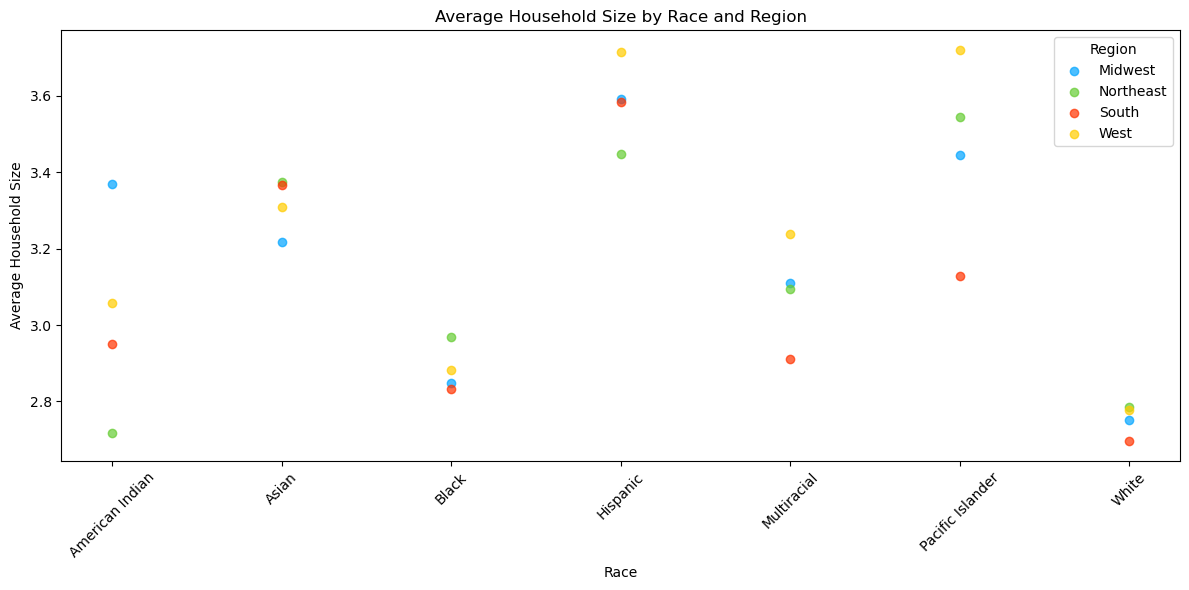

In [31]:
# Define custom colors for each region
regionColors = {
    'Midwest': '#02a5ff',
    'South': '#ff3300',
    'Northeast': '#66cc33',
    'West': '#ffcc00'
}
#Create the scatter plot
plt.figure(figsize=(12, 6))
for region in grouped_data['Region'].unique():
    region_data = grouped_data[grouped_data['Region'] == region]
    plt.scatter(
        region_data['Race'], 
        region_data['AvgHouseholdSize'], 
        label=region, 
        color=regionColors.get(region), 
        alpha=0.7
    )

plt.title('Average Household Size by Race and Region')
plt.xlabel('Race')
plt.ylabel('Average Household Size')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart as a PNG file
plt.savefig("avghouse_by_race_region.png", dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

In [32]:
###Question 4: Industry Representation and Employment 
#What industries dominate employment across different demographic groups, and which groups are underrepresented in certain industries?
##Focus: Highlight industries where specific demographic groups are over or underrepresented.
##Visualizations: Industry participation heatmaps or box plots illustrating demographic representation across industries.

In [33]:
# Industry Representation and Employment Analysis
# Creating a DataFrame grouped by demographic groups and industries
# Creating age groups
def age_group(age):
    if age < 20:
        return 'Below 20'
    elif 20 <= age < 30:
        return '20-29'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    elif 50 <= age < 60:
        return '50-59'
    else:
        return '60 and above'

# Adding AgeGroup column to the DataFrame
data['AgeGroup'] = data['Age'].apply(age_group)
industry_representation = data.groupby(['Industry', 'Sex', 'Race', 'AgeGroup']).size().reset_index(name='Count')

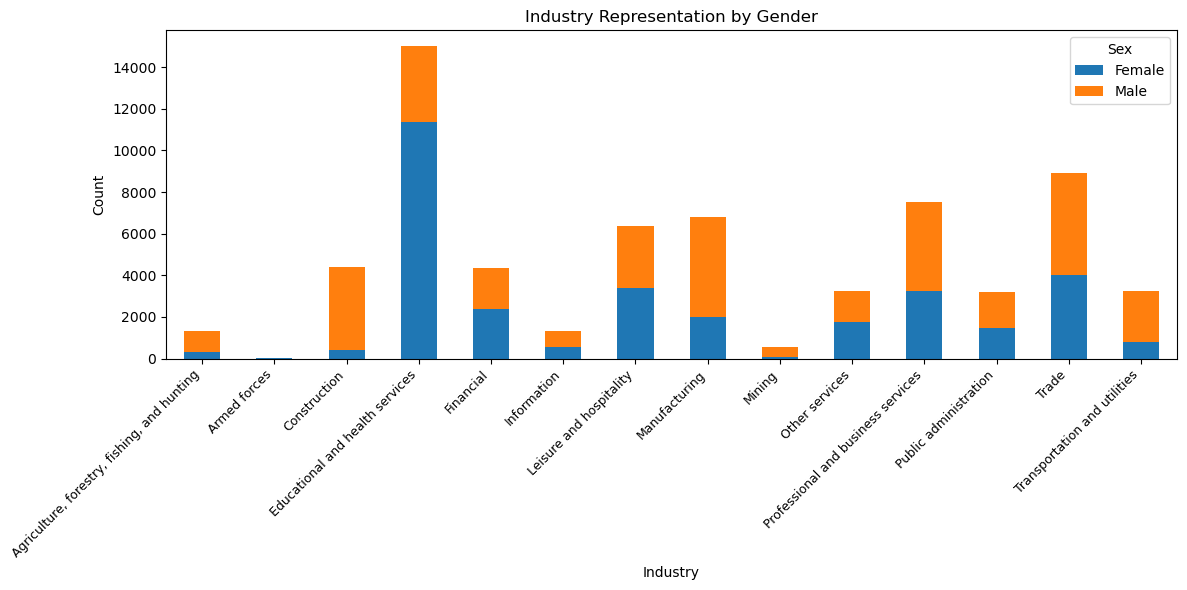

In [34]:
# Visualization 1: Industry Representation by Gender using a Bar Chart
# Explanation 1: This bar chart helps us understand which industries are dominated by males or females, highlighting over or underrepresentation.

plt.figurefigsize=(12, 6)
gender_counts = data.groupby(['Industry', 'Sex']).size().unstack().fillna(0)
gender_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Industry Representation by Gender')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()

# Save the chart as a PNG file
plt.savefig("Distribution_by_region.png", dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

<Figure size 1400x800 with 0 Axes>

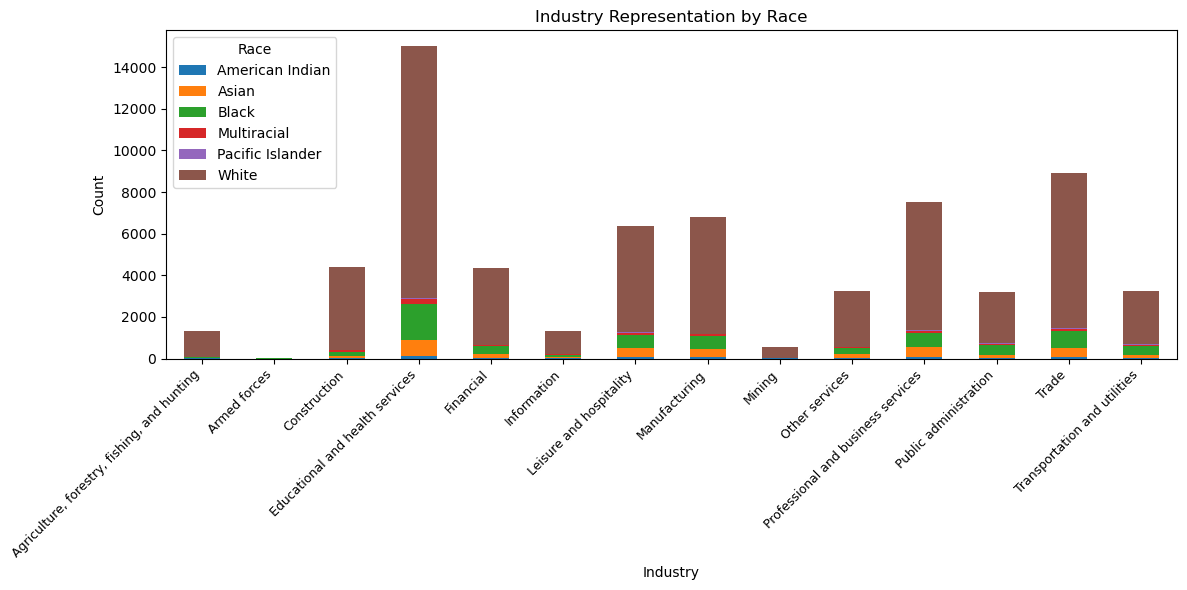

In [35]:
# Visualization 2: Industry Representation by Race using a Bar Chart
# Explanation 2: This bar chart helps us visualize representation across different races in various industries, helping identify racial disparities.
plt.figure(figsize=(14, 8))
race_counts = data.groupby(['Industry', 'Race']).size().unstack().fillna(0)
race_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Industry Representation by Race')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()

# Save the chart as a PNG file
plt.savefig("industry_by_race.png", dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

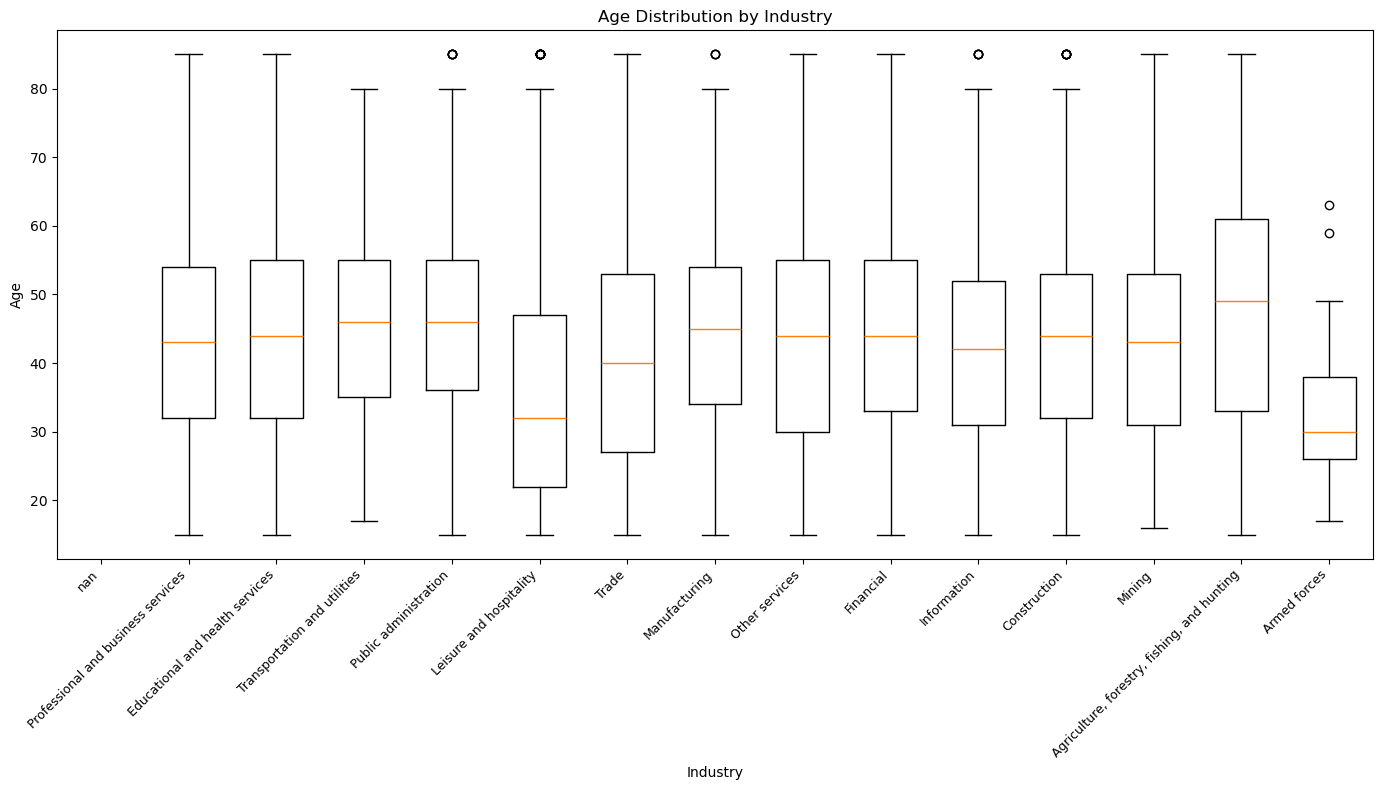

In [36]:
# Visualization 3: Box Plot of Industry Representation by Age Group using Matplotlib
plt.figure(figsize=(14, 8))
for industry in data['Industry'].unique():
    subset = data[data['Industry'] == industry]
    plt.boxplot(subset['Age'], positions=[list(data['Industry'].unique()).index(industry)], widths=0.6)
plt.xticks(range(len(data['Industry'].unique())), data['Industry'].unique(), rotation=45, ha='right', fontsize=9)
plt.xlabel('Industry')
plt.ylabel('Age')
plt.title('Age Distribution by Industry')
plt.tight_layout()

# Save the chart as a PNG file
plt.savefig("age_by_industry.png", dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

In [37]:
# Create age bins
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '31-45', '46-60', '60+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Group by demographics and employment status
grouped = data.groupby(['Sex', 'Education', 'Married', 'AgeGroup', 'EmploymentStatus']).size().unstack(fill_value=0)

# Calculate percentages within groups
group_percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100


In [38]:
# Calculate percentages within groups
group_percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

group_percentages.head()  # Preview the grouped data

EmploymentStatus                            Disabled   Employed  \
Sex    Education        Married  AgeGroup                         
Female Associate degree Divorced <18             NaN        NaN   
                                 18-30      0.000000  73.809524   
                                 31-45      4.054054  81.981982   
                                 46-60     10.112360  75.000000   
                                 60+        6.726457  46.188341   

EmploymentStatus                           Not in Labor Force    Retired  \
Sex    Education        Married  AgeGroup                                  
Female Associate degree Divorced <18                      NaN        NaN   
                                 18-30              16.666667   0.000000   
                                 31-45               8.108108   0.450450   
                                 46-60               6.179775   3.932584   
                                 60+                 3.587444  40.358744   

EmploymentStatus                           Unemployed  
Sex    Education        Married  AgeGroup              
Female Associate degree Divorced <18              NaN  
                                 18-30       9.523810  
                                 31-45       5.405405  
                                 46-60       4.775281  
                                 60+         3.139013

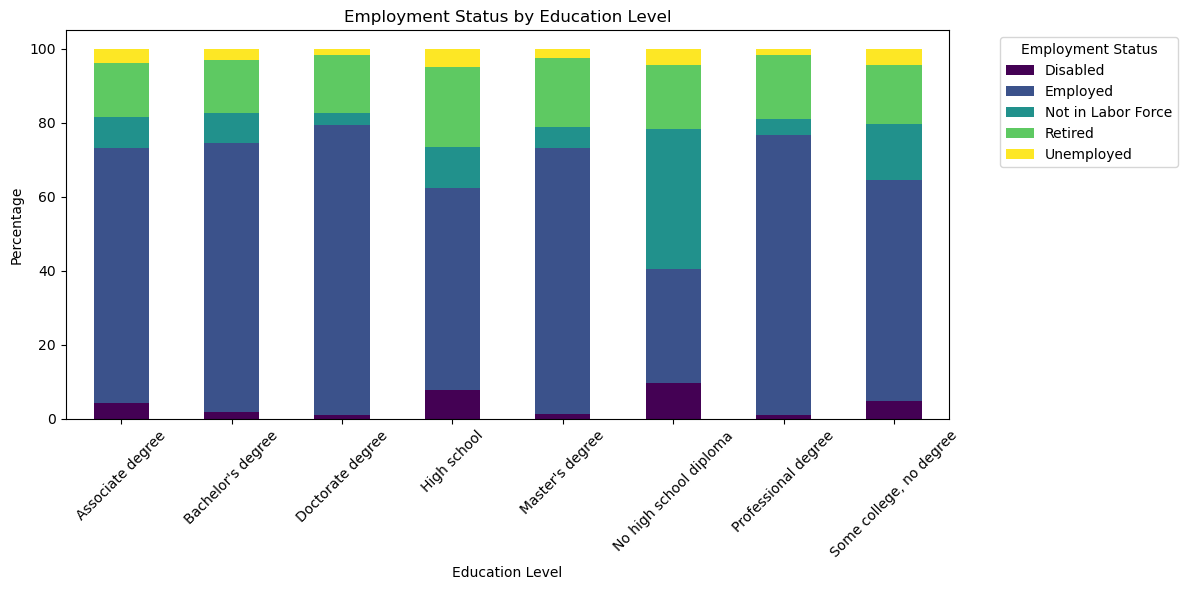

In [39]:
# Aggregate by education and employment status
grouped_by_education = data.groupby(['Education', 'EmploymentStatus']).size().unstack(fill_value=0)

# Calculate percentages
education_percentages = grouped_by_education.div(grouped_by_education.sum(axis=1), axis=0) * 100

# Visualize as a stacked bar chart
import matplotlib.pyplot as plt

education_percentages.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Employment Status by Education Level")
plt.ylabel("Percentage")
plt.xlabel("Education Level")
plt.legend(title="Employment Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart as a PNG file
plt.savefig("employment_by_education.png", dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

In [40]:
### Question 5: Barriers and Opportunities
#Are there correlations between household size and higher education attainment, especially in states with larger households?
##Focus: Investigate if larger households correlate with lower levels of higher education attainment and the systemic or cultural factors that may influence this trend
##Potential Insights: Understand how educational opportunities and systemic access impact family dynamics and educational outcomes.

In [41]:
# Group data by Industry and Race, and calculate counts
industry_representation = filteredData.groupby(['Industry', 'Race']).size().unstack(fill_value=0)

# Calculate percentage representation within each industry
industry_representation_pct = industry_representation.div(industry_representation.sum(axis=1), axis=0) * 100

# Display representation percentages
industry_representation_pct.head()

Race,American Indian,Asian,Black,Hispanic,Multiracial,Pacific Islander,White
Industry,,,,,,,
"Agriculture, forestry, fishing, and hunting",0.634417,1.348136,1.189532,16.494845,0.555115,0.158604,79.619350
Armed forces,0.000000,3.703704,14.814815,14.814815,0.000000,0.000000,66.666667
Construction,0.785945,1.941748,4.207120,18.469718,1.386963,0.369857,72.838650
Educational and health services,0.824614,4.712078,11.302058,9.056891,1.198808,0.374194,72.531356
Financial,0.328253,4.947245,7.831184,8.276671,0.984760,0.257913,77.373974


Education             Associate degree  Bachelor's degree  Doctorate degree  \
Citizenship                                                                   
Citizen, Native               9.948798          18.833482          1.314559   
Citizen, Naturalized          9.007519          22.105263          2.902256   
Non-Citizen                   4.658063          14.167038          2.062009   

Education             High school  Master's degree  No high school diploma  \
Citizenship                                                                  
Citizen, Native         30.040071         7.485530               13.258014   
Citizen, Naturalized    26.511278         8.541353               18.165414   
Non-Citizen             25.352322         7.402463               36.685952   

Education             Some college, no degree  
Citizenship                                    
Citizen, Native                     19.119546  
Citizen, Naturalized                12.766917  
Non-Citizen          

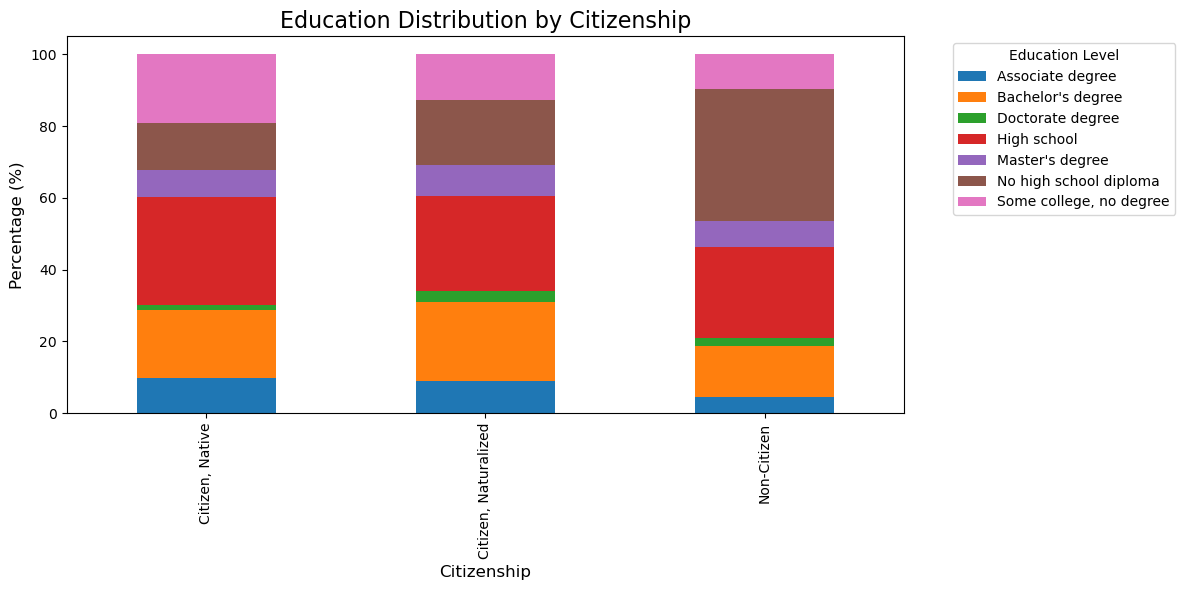

In [42]:
# Group by Citizenship and Education, and calculate counts
education_citizenship = filteredData.groupby(['Citizenship', 'Education']).size().unstack(fill_value=0)

# Calculate percentage distribution within each citizenship group
education_citizenship_pct = education_citizenship.div(education_citizenship.sum(axis=1), axis=0) * 100

# Display grouped data
print(education_citizenship_pct)

# Plot stacked bar chart
education_citizenship_pct.plot(kind='bar', figsize=(12, 6), stacked=True)

# Add titles and labels
plt.title('Education Distribution by Citizenship', fontsize=16)
plt.xlabel('Citizenship', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the chart as a PNG file
plt.savefig("education_by_citizenship.png", dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

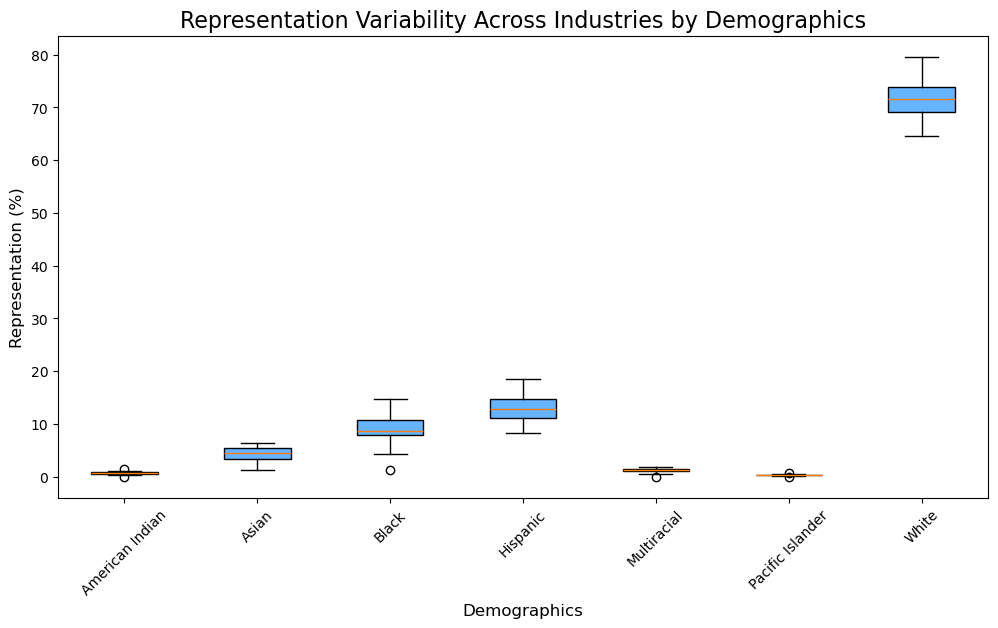

In [43]:
# Melt data for plotting
industry_melted = industry_representation_pct.reset_index().melt(
    id_vars='Industry', var_name='Demographic', value_name='Representation'
)

# Group data by demographics for box plot
demographics = industry_melted['Demographic'].unique()
data = [industry_melted[industry_melted['Demographic'] == demo]['Representation'] for demo in demographics]

# Plot box plot
plt.figure(figsize=(12, 6))
plt.boxplot(data, labels=demographics, patch_artist=True, boxprops=dict(facecolor="#66b3ff"))

# Add labels
plt.title('Representation Variability Across Industries by Demographics', fontsize=16)
plt.xlabel('Demographics', fontsize=12)
plt.ylabel('Representation (%)', fontsize=12)
plt.xticks(rotation=45)

# Save the chart as a PNG file
plt.savefig("representation_across_industry.png", dpi=300, bbox_inches='tight')

# Display the chart
plt.show()